## Random variable distributions

In [3]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 3

'%.3f'

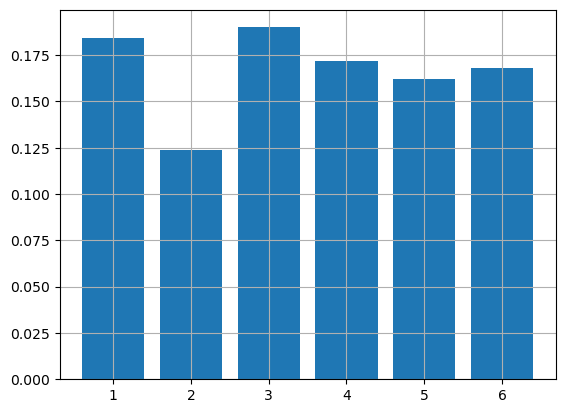

In [26]:
# uniform distribution

cal_steps = 500
dice_data = np.array([1,2,3,4,5,6])
prob_data = np.array([])

dice_rolls = np.random.choice(dice_data, cal_steps)

for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i]) / cal_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i]) / cal_steps)
    
plt.bar(dice_data, prob_data)
plt.grid()




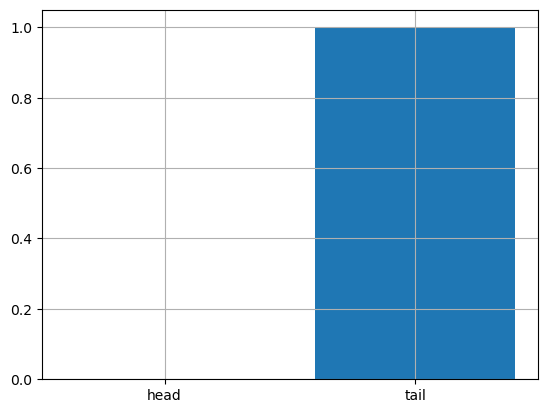

In [34]:
# Bernoulli Distribution

# 동전 던지기 simulation : 1 --> head, 0 --> tail

cal_steps = 2
coin_data = np.array(['head', 'tail'])
prob_data = np.array([])

coin_flip = np.random.choice(coin_data, cal_steps)

for i in coin_data:
    p = len(coin_flip[coin_flip == i]) / cal_steps
    prob_data = np.append(prob_data, p)
    
plt.bar(coin_data, prob_data)
plt.grid()


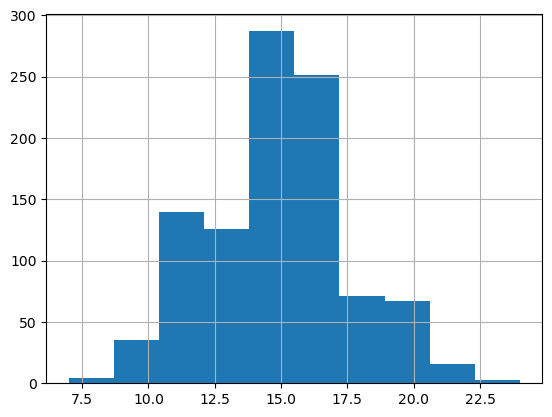

In [48]:
# Binomial Distribution
# 동전 던지기와 같은 시행을 n번 반복하여, 그 나온 합계가 이루는 분포

np.random.seed(77)

x  = np.random.binomial(30, 0.5, 1000)

plt.hist(x)
plt.grid()

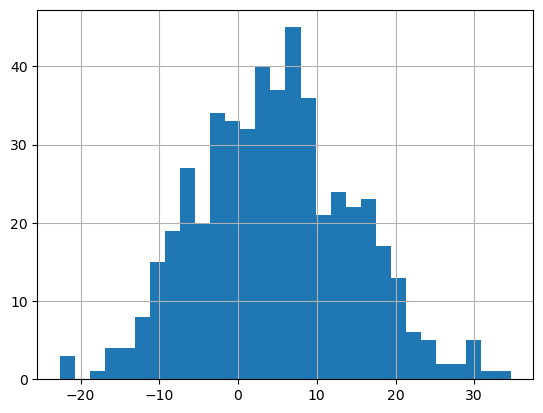

In [62]:
# Normal Distribution

#평균, 표준편차, sample수
x = np.random.normal(5, 10, 500)

plt.hist(x, bins = 30)
plt.grid(True)

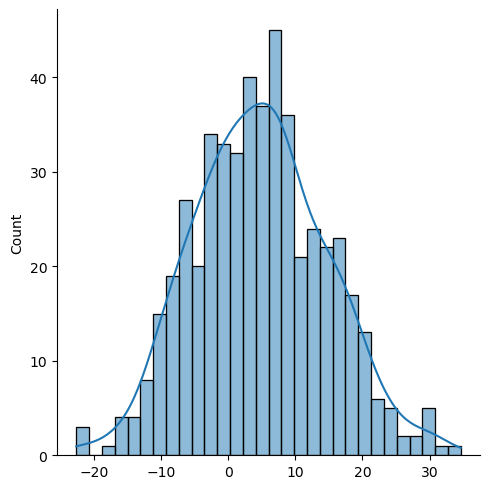

In [66]:
# 커널 밀도 추정

sns.displot(x, kde = True, bins= 30)
plt.show()

[ 1  3  4  7  9 12 17 20 21 23]


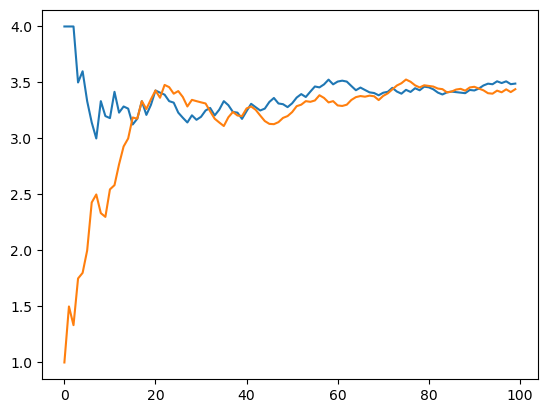

In [84]:
## Law of Large Number
## Random Variable의 표본의 숫자를 늘릴수록, 그 평균은 이론적 기대값에 가까워진다.

cal_times = 100
sample_array = np.array([1,2,3,4,5,6])
num_cnt = np.arange(1,cal_times +1)

for i in range(2):
    p = np.random.choice(sample_array, cal_times).cumsum()
    plt.plot(p/num_cnt)
    plt.grid()
    
print(p[:10])

In [101]:
# Cetral Limit Theorem
# 표본을 추출한 다음의 평균(표본평균)은, 추출하는 표본의 크기가 크질수록 정규분포에 가깝게 근사한다.

def func_clt(sample_num, exe_num):
    sample_array = np.array([1,2,3,4,5,6])
    num_cnt = np.arange(1, sample_num +1)
    mean_array = np.array([])
    
    for i in range(exe_num):
        cum_var = np.random.choice(sample_array, sample_num).cumsum()
        mean_array = np.append(mean_array, cum_var[sample_num - 1] / sample_num)
        
        plt.hist(mean_array)
        plt.grid(True)

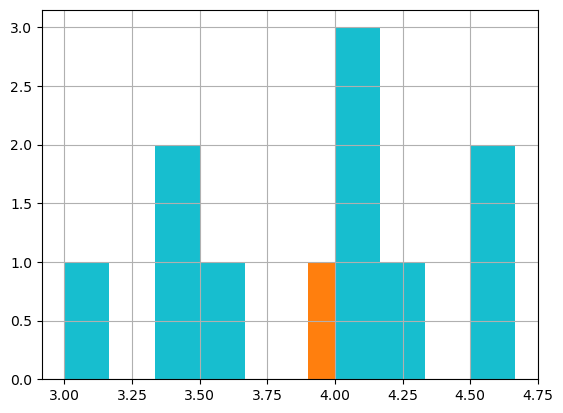

In [102]:
func_clt(3, 10)

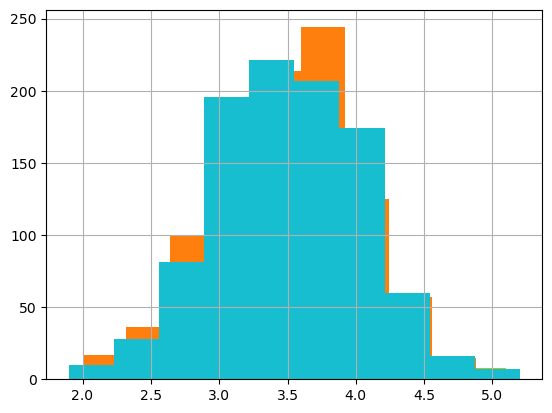

In [103]:
func_clt(10,1000)

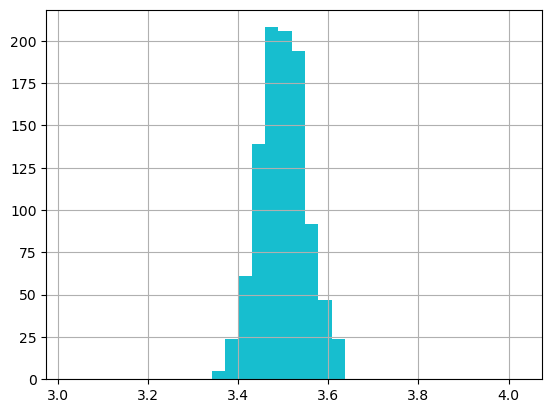

In [104]:
func_clt(1000, 1000)

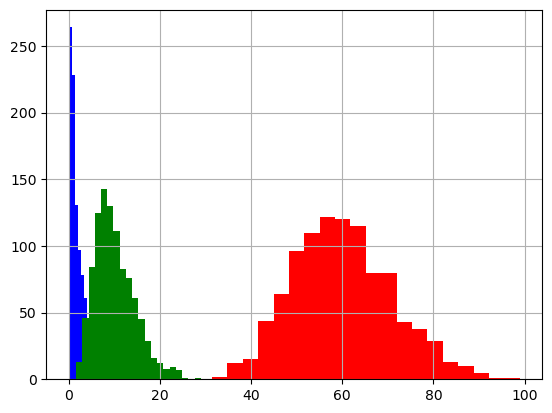

In [105]:
# chi-square distribution

for df, c in zip([2,10,60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color = c)
    plt.grid(True)

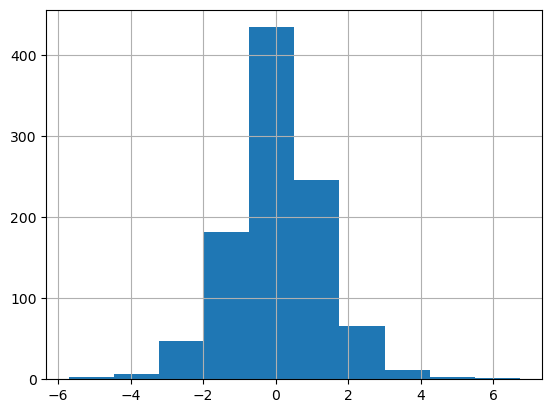

In [106]:
# t distribution
# 모분산(모표준편차)를 알지 못할 때, 표본표준편차를 사용하게 됨으로써 증가된 불확실성을 반영하는 분포
# 양끝단이 정규분포보다 약간 두껍다

x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

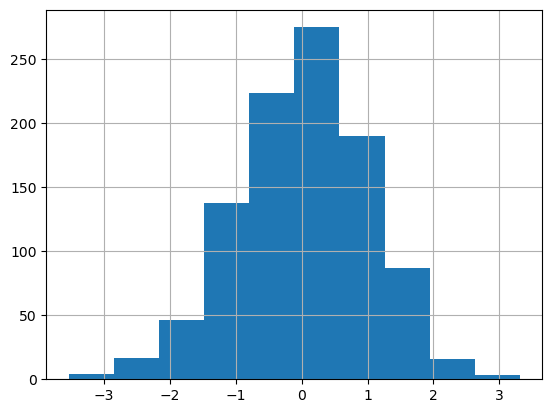

In [107]:
x = np.random.standard_t(30, 1000)
plt.hist(x)
plt.grid(True)

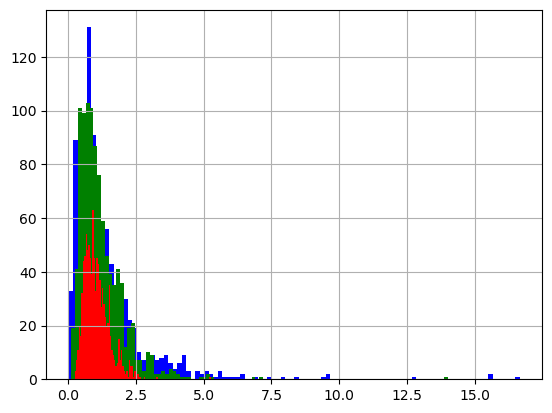

In [110]:
# F- distribution
# f분포는 자유도를 두개 가짐

for df,c in zip([(6,7), (10,10), (20,25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, bins= 100, color=c )
    plt.grid(True)
    
    